# Pythonではじめる機械学習　4章のまとめ

4章のタイトルは「データの表現と特徴量エンジニアリング」である  
まとめるにあたって，次の点に重点を置く  
・同じデータの別の特徴量の表現がどのような効果を生むか  
・どのように特徴量を選ぶべきか

In [29]:
import numpy as np
import pandas as pd
import os
import mglearn
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [18]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#データセット詳細http://pythondatascience.plavox.info/scikit-learn/scikit-learn%E3%81%AB%E4%BB%98%E5%B1%9E%E3%81%97%E3%81%A6%E3%81%84%E3%82%8B%E3%83%87%E3%83%BC%E3%82%BF%E3%82%BB%E3%83%83%E3%83%88
boston = load_boston()

X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=0)

# rescale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(379, 13)
(127, 13)


In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))


X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [21]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))


Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


# 交互作用の効果

### 線形モデルに対して

In [23]:

from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions in train: {:.3f}".format(
    ridge.score(X_train_scaled, y_train)))
print("Score without interactions: {:.3f}".format(
    ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions in train: {:.3f}".format(
    ridge.score(X_train_poly, y_train)))
print("Score with interactions: {:.3f}".format(
    ridge.score(X_test_poly, y_test)))

Score without interactions in train: 0.766
Score without interactions: 0.621
Score with interactions in train: 0.887
Score with interactions: 0.753


## ランダムフォレスト

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score without interactions in train: {:.3f}".format(
    rf.score(X_train_scaled, y_train)))
print("Score without interactions: {:.3f}".format(
    rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions in train: {:.3f}".format(rf.score(X_train_poly, y_train)))
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score without interactions in train: 0.985
Score without interactions: 0.807
Score with interactions in train: 0.986
Score with interactions: 0.775


## SVR

In [25]:
from sklearn.svm import SVR
svr = SVR(gamma=1).fit(X_train_scaled, y_train)
print("Score without interactions in train: {:.3f}".format(
    svr.score(X_train_scaled, y_train)))
print("Score without interactions: {:.3f}".format(
    svr.score(X_test_scaled, y_test)))
svr = SVR(gamma=1).fit(X_train_poly, y_train)
print("Score with interactions in train: {:.3f}".format(svr.score(X_train_poly, y_train)))
print("Score with interactions: {:.3f}".format(svr.score(X_test_poly, y_test)))

Score without interactions in train: 0.684
Score without interactions: 0.478
Score with interactions in train: 0.594
Score with interactions: 0.386


交互作用項を追加すればよいというものではない．  
他に特徴量を追加する方法は，単変量非線形変換（log,sin,exp)，べき乗などが挙げられる．

# 特徴量選択

## 単変量選択

scikitlearn http://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection

In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
#データ　http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
cancer = load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


ANOVAで特徴量を決めている　http://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection  
全ての特徴量を使ったモデルとある特徴量を抜いたモデルとのF統計量を比べ最も悪い特徴量を抜く（たぶん）

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([], <a list of 0 Text yticklabel objects>)

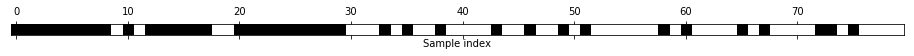

In [30]:
mask = select.get_support()
print(mask)
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

30個目までの特徴量が元のデータ，残りはノイズ

In [31]:

from sklearn.linear_model import LogisticRegression

# transform test data
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(
    lr.score(X_test_selected, y_test)))

Score with all features: 0.930
Score with only selected features: 0.940


## モデルベース選択

http://scikit-learn.org/stable/modules/feature_selection.html

そのモデルにおける重要度によって特徴量の選択を行う

In [32]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

In [33]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


In [38]:
select.feature_importances_

AttributeError: 'SelectFromModel' object has no attribute 'feature_importances_'

([], <a list of 0 Text yticklabel objects>)

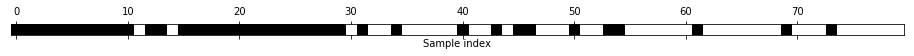

In [34]:

mask = select.get_support()
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [35]:
score = LogisticRegression().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score　of l1: {:.3f}".format(score))

Test score: 0.930
Test score　of l1: 0.951
